### How much time have I spent watching The Office?
* A user wants to know how long they spent watching the show 'The Office' on netflix, so data was downloaded and an analysis done to answer this question

In [1]:
import pandas as pd

In [2]:
#how the data looks like
with open('data.txt', 'r') as f:
        txt = f.read()
        print(txt[:500])

Charlie,2013-03-20 5:17:53,0:00:05,,Star Trek: Deep Space Nine: Season 5: Empok Nor (Episode 24),,Mac,0:00:05,Not latest view,US (United States) Charlie,2013-03-20 4:27:45,0:44:31,,Star Trek: Deep Space Nine: Season 5: Blaze of Glory (Episode 23),,Mac,0:44:31,Not latest view,US (United States) Charlie,2013-03-20 4:05:21,0:22:06,,Star Trek: Deep Space Nine: Season 5: Children of Time (Episode 22),,Mac,0:44:37,0:44:37,US (United States) Charlie,2013-03-20 0:20:03,0:48:14,,The Invisible War,,Micros


In [3]:
def get_items(mydata):
    my_list = ''
   # new_list = ''
    
    with open(mydata, 'r') as f:
        txt = f.read()
        my_list = [x.split(',') for x in txt.split('(United States)')]
        
    my_list = [l for l in my_list if len(l) == 10] # data contains 10 columns
       
    return my_list
        

In [4]:
b = get_items('data.txt')

In [5]:
#check how the data looks like
b[:3]

[['Charlie',
  '2013-03-20 5:17:53',
  '0:00:05',
  '',
  'Star Trek: Deep Space Nine: Season 5: Empok Nor (Episode 24)',
  '',
  'Mac',
  '0:00:05',
  'Not latest view',
  'US '],
 [' Charlie',
  '2013-03-20 4:27:45',
  '0:44:31',
  '',
  'Star Trek: Deep Space Nine: Season 5: Blaze of Glory (Episode 23)',
  '',
  'Mac',
  '0:44:31',
  'Not latest view',
  'US '],
 [' Charlie',
  '2013-03-20 4:05:21',
  '0:22:06',
  '',
  'Star Trek: Deep Space Nine: Season 5: Children of Time (Episode 22)',
  '',
  'Mac',
  '0:44:37',
  '0:44:37',
  'US ']]

### create the dataframe

In [6]:

d = pd.DataFrame(b, columns = ['Profile Name','Start Time','Duration','Attributes','Title','Supplemental Video Type','Device Type','Bookmark','Latest Bookmark','Country'])
d.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,,Star Trek: Deep Space Nine: Season 5: Empok No...,,Mac,0:00:05,Not latest view,US
1,Charlie,2013-03-20 4:27:45,0:44:31,,Star Trek: Deep Space Nine: Season 5: Blaze of...,,Mac,0:44:31,Not latest view,US
2,Charlie,2013-03-20 4:05:21,0:22:06,,Star Trek: Deep Space Nine: Season 5: Children...,,Mac,0:44:37,0:44:37,US
3,Charlie,2013-03-20 0:20:03,0:48:14,,The Invisible War,,Microsoft Xbox 360,0:53:18,0:53:18,US
4,Charlie,2013-03-20 0:10:31,0:04:51,,The Invisible War,,Mac,0:05:01,Not latest view,US


### Drop unnecessary columns

In [7]:
df = d.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


### Check  and change data types

In [8]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [9]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True) # utc = Universal time zone


In [10]:
# convert utc to my timezone
#need to first set the column to index
df = df.set_index('Start Time')

df.index = df.index.tz_convert('Africa/Nairobi')




In [11]:
df = df.reset_index()

In [12]:
df.head(3)

,Start Time,Duration,Title
0,2013-03-20 08:17:53+03:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 07:27:45+03:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 07:05:21+03:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...


In [13]:
df['Duration'] = pd.to_timedelta(df['Duration'])

### get only office data

In [14]:
office_df = df[df['Title'].str.contains('The Office (U.S.)', regex=False)] # regex = False tells the function that the string is not a regular expression
office_df.head()

,Start Time,Duration,Title
9,2013-03-19 02:25:36+03:00,0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...
10,2013-03-19 02:04:22+03:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...
11,2013-03-19 01:42:50+03:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...
12,2013-03-19 01:21:52+03:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...
13,2013-03-19 01:20:53+03:00,0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...


In [15]:
# some durations are seconds which means that was a preview and not really watching, so we remove those small durations
office_df = office_df[office_df['Duration'] >= '0 days 00:05:00']


### Time spent watching the office


In [16]:
office_df['Duration'].sum()

Timedelta('1 days 12:56:40')

### When does the user watch The Office?

In [17]:
office_df['Weekday'] = office_df['Start Time'].dt.day_name()
office_df['Hour'] = office_df['Start Time'].dt.hour

In [18]:
office_by_day = office_df['Weekday'].value_counts()
office_by_day

Saturday     25
Monday       24
Tuesday      22
Sunday       15
Wednesday    12
Friday       10
Thursday      8
Name: Weekday, dtype: int64

In [19]:
import matplotlib.pyplot as plt

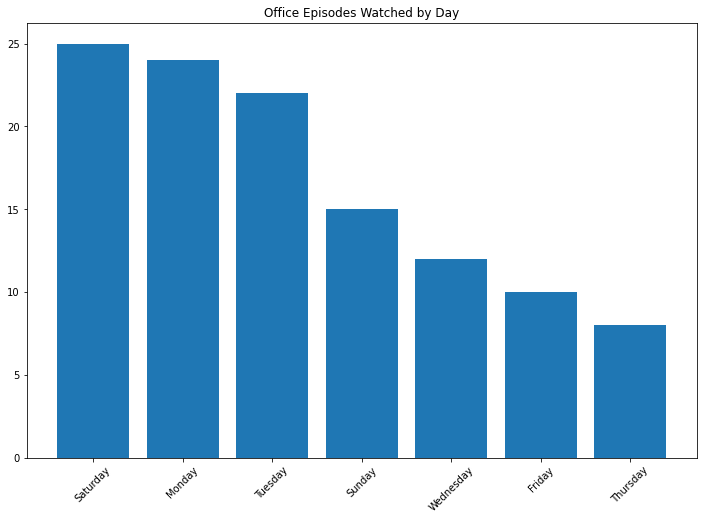

In [20]:
plt.figure(figsize=(12,8))
plt.bar(office_by_day.index,office_by_day)
plt.title('Office Episodes Watched by Day')
plt.xticks(rotation=45);

* The user watched the office mostly on Sunday, Monday and Tuesday

In [21]:
office_by_hour = office_df['Hour'].value_counts()

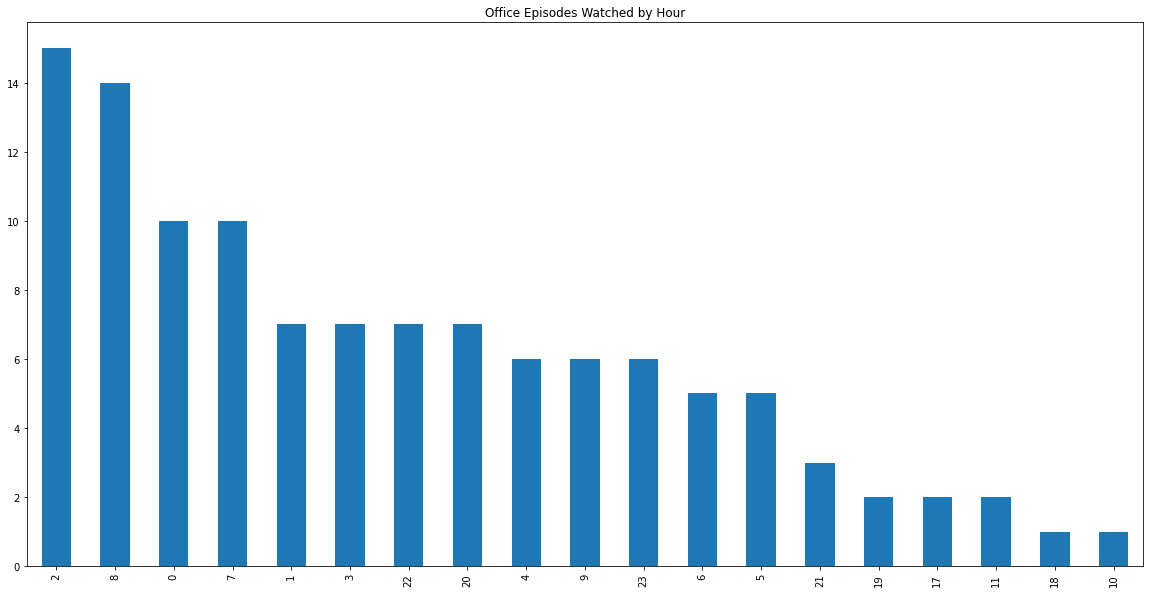

In [22]:
office_by_hour.plot(kind = 'bar' , figsize=(20,10), title = 'Office Episodes Watched by Hour');

* It shows the user watched mostly between midnight and 2 a.m an also between 7 and 8 a.m.